# RandomForestRegressor

Se va entrenando con n elementos y se predice el n+1, a continuación con n+1 y se prediuce n+2....

In [2]:
import pandas as pd
url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)


LABORABLE
SABADO
DOMINGO
FESTIVO


In [6]:
def prepara(df,coly,f,p):
    colsX = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","CO", "NO", "NO2","PM2.5","PM10","NOx", "O3" ]
    df2 = df.copy()
    for i in range(1,p+1):
        for c in colsX:
            df2[c+"ANT"+str(i)] = df[c].shift(+i)
            
    for i in range(1,f+1):
        df2[f"f{i}"] = df[coly].shift(-1*i)
        
    df2 = df2[p:len(df)-f]
    return df2

def muestraArray(acc,f):
    print("[",end="")
    for j in range(0,f):
            print(f"{round(acc[j]/(total+1),4)}",end=",")    
    print("]")

Lo mismo, pero con el método Naïve

In [28]:
len(df2.columns)

71

In [92]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
f = 100
p = 0
acc = [0]*(f)
acc_n = [0]*(f)
total= 0

coly = "NO2"
df2 = prepara(df,coly,f,p)
X = [c for c in df2.columns if (not c.startswith("f")) and (c!='FECHAH') and (c!='TIPO')]
print(X)
#metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(1,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        #modelo = metodo.fit(X_train,y_train)
        #y_pred = modelo.predict([X_test])
        #acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test[coly]-y_real)
    if total % 100 == 0:
        #muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1   

<ipython-input-6-176ab9f5268b>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f"f{i}"] = df[coly].shift(-1*i)


['CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA', 'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10', 'ES53', 'ESSUMA', 'hora', 'LABORABLE', 'SABADO', 'DOMINGO', 'FESTIVO']
[43.0,36.0,40.0,43.0,40.0,6.0,18.0,20.0,22.0,21.0,15.0,6.0,7.0,4.0,2.0,1.0,3.0,28.0,27.0,23.0,22.0,20.0,10.0,11.0,34.0,27.0,48.0,45.0,5.0,21.0,21.0,19.0,16.0,20.0,16.0,11.0,5.0,15.0,7.0,20.0,27.0,21.0,23.0,14.0,34.0,28.0,28.0,19.0,16.0,10.0,2.0,15.0,14.0,12.0,17.0,19.0,23.0,20.0,17.0,21.0,17.0,20.0,6.0,6.0,22.0,29.0,34.0,36.0,35.0,34.0,21.0,15.0,28.0,4.0,4.0,2.0,20.0,19.0,26.0,19.0,25.0,27.0,19.0,0.0,5.0,8.0,7.0,9.0,14.0,28.0,32.0,33.0,27.0,35.0,36.0,32.0,20.0,25.0,30.0,32.0,]
[8.2376,12.7327,16.3465,19.4752,21.6238,22.2772,22.3366,20.3861,18.6139,17.2376,16.1089,15.7327,17.0396,18.4752,20.0396,21.4059,21.9307,22.1485,20.8911,18.5842,16.3168,13.505,12.099,12.1485,13.703,15.3564,17.2079,19.4356,20.2376,20.4752,20.3069,19.4752,18.0396,16.7525,16.0,16.

### Representación gráfica

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def muestra(naive,real,coly):
    x = list(range(2,len(naive)+2))
    figure, ax = plt.subplots(1,figsize=(len(x) // 3,4),dpi=100)
    
    plt.plot(x,naive,label="naïve")
    plt.plot(x,real,label="RandomForest")
    ax.set_xlabel('Horas')
    ax.set_ylabel('MAE')
    #plt.plot(list(range(1,len(naive)+1)),np.array(real)-np.array(naive),label="difference")
    #plt.plot([0,len(naive)+1],[0,0],"--",color="black")
    plt.title(coly)
    plt.legend()
    plt.xticks(x,rotation=45, ha='center')
    plt.grid()
    plt.show()
    figure, ax = plt.subplots(1,figsize=(len(x) // 3,4),dpi=100)
    
    y = (np.array(real)-np.array(naive))/np.array(naive)*100
    plt.plot(list(range(1,len(naive)+1)),y,label="")
    plt.title(f"{coly}: diferencia de MAE entre RandomForest y naïve en % ")
    plt.xticks(x,rotation=45, ha='center')
    plt.grid()
    #plt.legend()
    plt.show()
# todas las horas

def muestra2(naive,real10,real0,coly):
    x = list(range(2,len(naive)+2))
    figure, ax = plt.subplots(1,figsize=(len(x) // 3,4),dpi=100)
    color10 = "green"
    color0  = "blue"
    plt.plot(x,naive,label="naïve",color="orange")
    plt.plot(x,real10,label="RandomForest f=48, p=10",color=color10)
    plt.plot(x,real0,label="RandomForest f=48, p=0",color=color0)
    ax.set_xlabel('Horas')
    ax.set_ylabel('MAE')
    #plt.plot(list(range(1,len(naive)+1)),np.array(real)-np.array(naive),label="difference")
    #plt.plot([0,len(naive)+1],[0,0],"--",color="black")
    plt.title(coly)
    plt.legend()
    plt.xticks(x,rotation=45, ha='center')
    plt.grid()
    plt.show()
    figure, ax = plt.subplots(1,figsize=(len(x) // 3,4),dpi=100)
    
    y10 = (np.array(real10)-np.array(naive))/np.array(naive)*100
    y0 = (np.array(real0)-np.array(naive))/np.array(naive)*100
    plt.plot(list(range(1,len(naive)+1)),y10,label="RandomForest f=48, p=10",color=color10)
    plt.plot(list(range(1,len(naive)+1)),y0,label="RandomForest f=48, p=0",color=color0)
    plt.title(f"{coly}: diferencia de MAE entre RandomForest y naïve en % ")
    ax.set_xlabel('Horas')
    ax.set_ylabel('% inc. MAE')
    plt.legend()
    plt.xticks(x,rotation=45, ha='center')
    plt.grid()
    #plt.legend()
    plt.show()


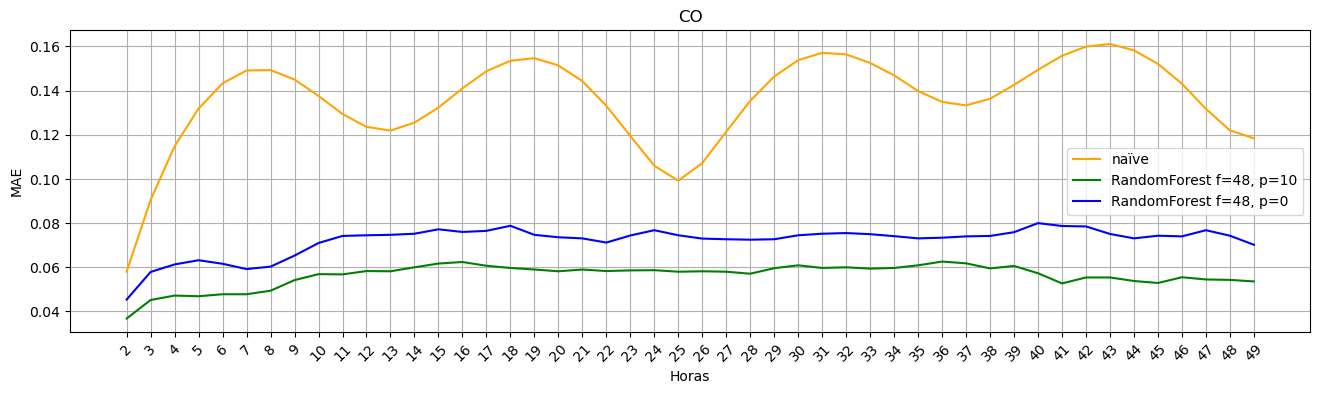

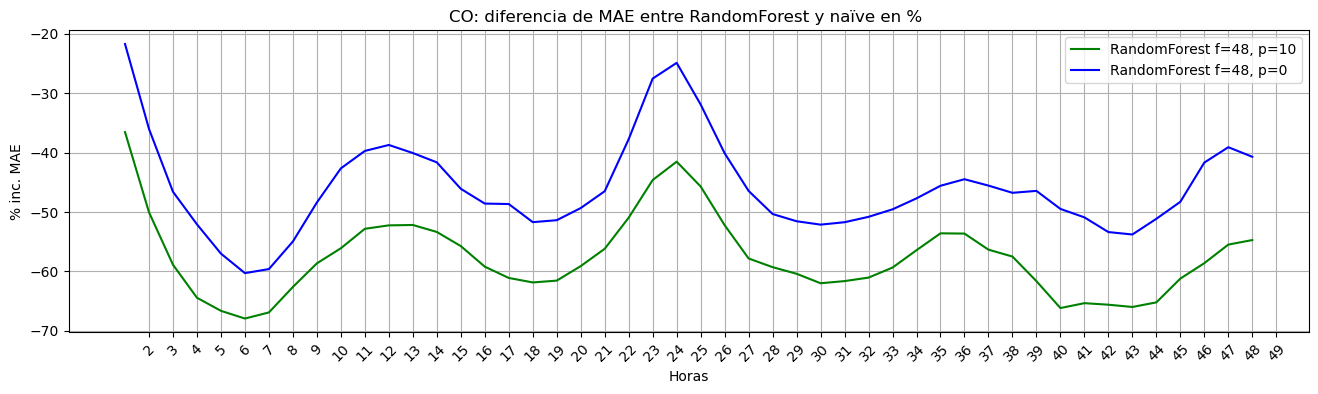

In [40]:
coly = "CO"
naive = [0.058,0.0905,0.1148,0.1319,0.1433,0.1491,0.1493,0.145,0.1376,0.1294,0.1236,0.1219,0.1255,0.1323,0.141,0.1488,0.1535,0.1547,0.1514,0.1443,0.1331,0.1195,0.106,0.0992,0.1072,0.1214,0.1354,0.1464,0.1538,0.1571,0.1564,0.1525,0.1469,0.1398,0.1349,0.1333,0.1363,0.1426,0.1494,0.1558,0.1599,0.1611,0.1582,0.1521,0.1431,0.1317,0.122,0.1184,]
# 48 hora f, 10 pasado, 271 columnas
real10 = [0.0368,0.0452,0.0472,0.0469,0.0478,0.0478,0.0494,0.0542,0.0569,0.0568,0.0583,0.0582,0.06,0.0617,0.0624,0.0607,0.0597,0.059,0.0582,0.059,0.0583,0.0586,0.0587,0.058,0.0582,0.058,0.0571,0.0596,0.0609,0.0597,0.06,0.0594,0.0597,0.0609,0.0626,0.0618,0.0595,0.0606,0.0573,0.0527,0.0554,0.0554,0.0538,0.0529,0.0555,0.0545,0.0543,0.0536,]
# 48 horas f, 0 pasado, 71 columnas
real0 = [0.0454,0.0579,0.0613,0.0632,0.0616,0.0592,0.0603,0.0653,0.071,0.0742,0.0745,0.0747,0.0752,0.0772,0.076,0.0765,0.0788,0.0747,0.0736,0.0731,0.0712,0.0744,0.0768,0.0745,0.073,0.0727,0.0725,0.0727,0.0745,0.0752,0.0755,0.075,0.0741,0.0731,0.0734,0.074,0.0742,0.0759,0.08,0.0787,0.0785,0.0751,0.0731,0.0743,0.074,0.0768,0.0743,0.0702,]
muestra2(naive,real10,real0,coly)

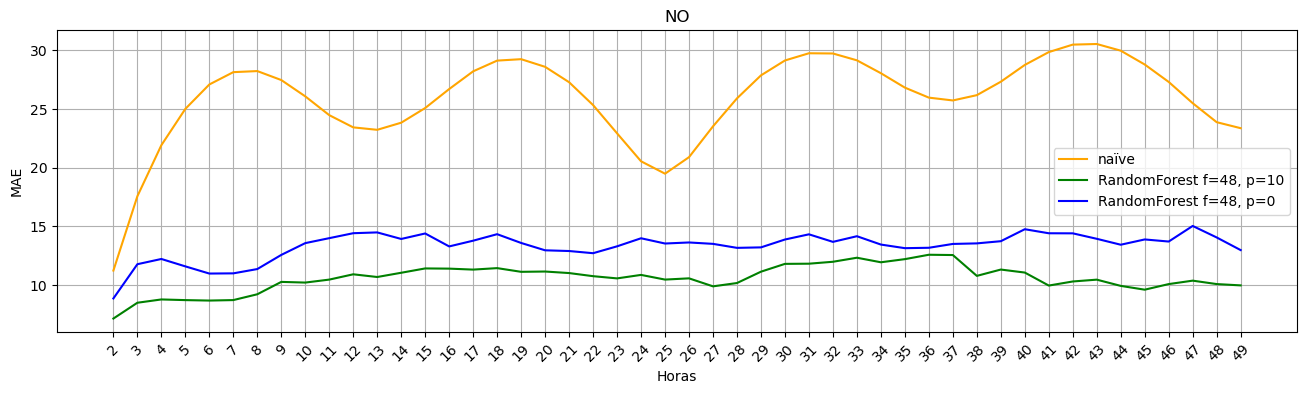

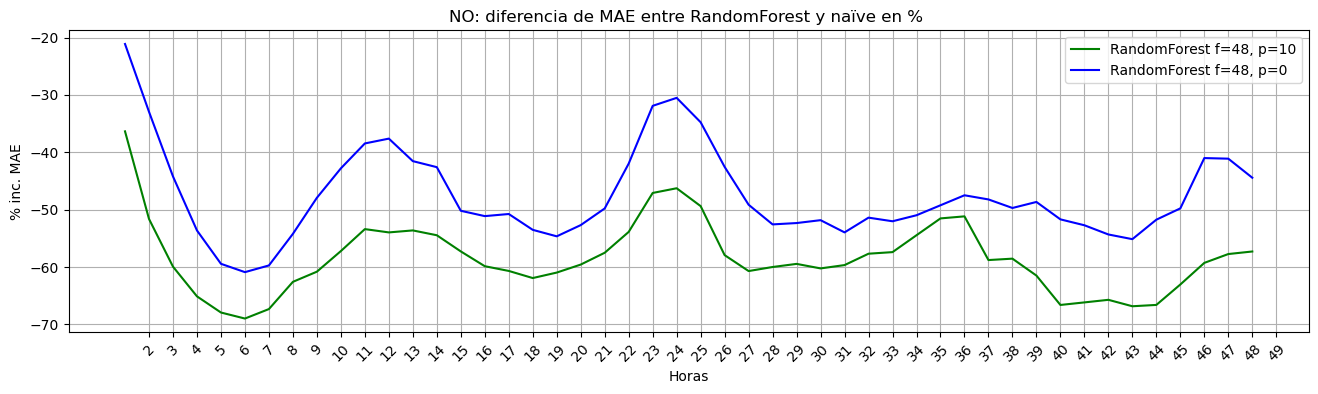

In [48]:
coly = "NO"
naive = [11.2407,17.5718,21.9213,25.015,27.0937,28.1439,28.2358,27.4711,26.0821,24.4809,23.4397,23.2317,23.8381,25.0878,26.7043,28.2145,29.1275,29.2492,28.5973,27.2865,25.3385,22.9324,20.55,19.4939,20.9027,23.527,25.9102,27.8701,29.139,29.7535,29.7342,29.1515,28.053,26.8259,25.9733,25.7333,26.1843,27.3292,28.7586,29.8531,30.4893,30.5423,29.9737,28.795,27.3105,25.5002,23.8819,23.3708,]
real0 = [8.8661,11.783,12.2288,11.5981,10.987,11.004,11.3695,12.575,13.579,14.002,14.4239,14.4915,13.9339,14.4009,13.2978,13.7873,14.3406,13.5929,12.9668,12.9062,12.7206,13.3058,13.9929,13.5453,13.6351,13.5162,13.1756,13.2166,13.8867,14.329,13.6866,14.1673,13.4565,13.1493,13.183,13.5097,13.5568,13.7426,14.7632,14.419,14.4128,13.9474,13.4426,13.8923,13.714,15.0415,14.0621,12.985,]
real10 = [7.1541,8.5001,8.7809,8.7243,8.6858,8.7268,9.222,10.2765,10.2187,10.4715,10.9229,10.6926,11.0542,11.4228,11.4061,11.3235,11.4494,11.1343,11.1594,11.0287,10.7633,10.5747,10.8717,10.4731,10.5785,9.8966,10.1794,11.1464,11.8119,11.8268,11.9911,12.3347,11.9473,12.2149,12.5886,12.5639,10.789,11.3279,11.0715,9.964,10.312,10.4674,9.9366,9.6128,10.0897,10.3821,10.0911,9.9789,]
muestra2(naive,real10,real0,coly)

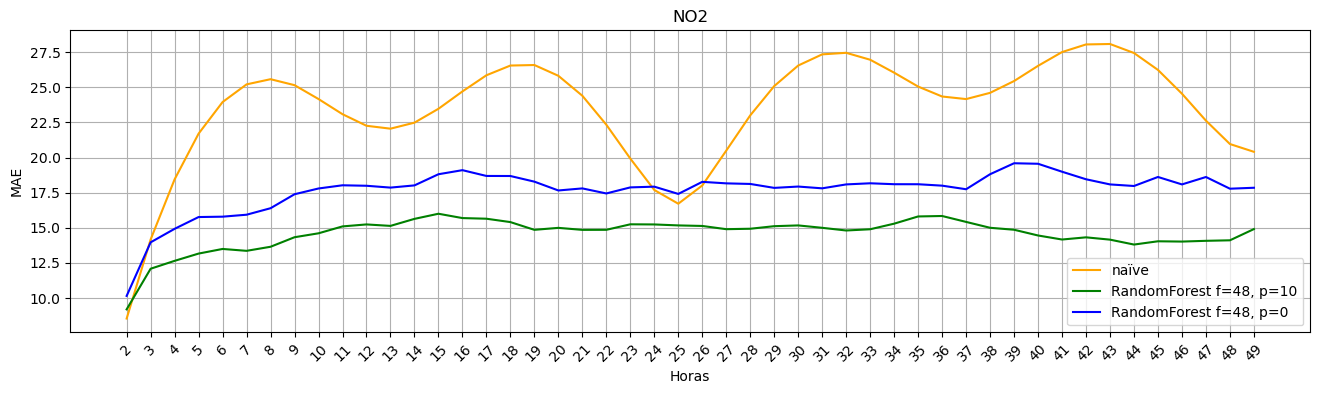

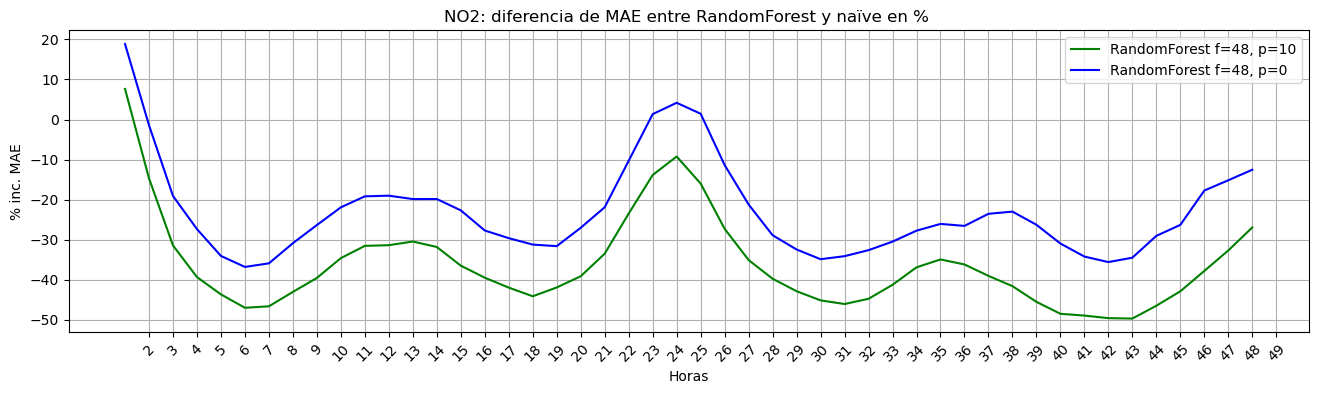

In [39]:
coly = "NO2"
naive = [8.542,14.1673,18.4483,21.7009,23.9481,25.2063,25.5749,25.1502,24.1632,23.085,22.2606,22.0537,22.4824,23.4692,24.7035,25.8541,26.5467,26.5833,25.8175,24.3969,22.3349,19.9265,17.6902,16.7135,18.0105,20.4926,22.9999,25.0854,26.5478,27.3425,27.4526,26.9598,26.0385,25.0504,24.3433,24.1599,24.6038,25.4433,26.5253,27.5058,28.0484,28.0798,27.4393,26.2344,24.5434,22.6253,20.961,20.4076]
# 48 hora f, 10 pasado, 271 columnas
real10 = [9.1943,12.0871,12.6478,13.1653,13.4945,13.3604,13.6504,14.3287,14.6081,15.0989,15.2395,15.1353,15.6349,16.0003,15.6915,15.6463,15.406,14.855,14.9956,14.8522,14.8563,15.2483,15.2382,15.1698,15.1309,14.9013,14.9319,15.1148,15.1691,14.9985,14.8083,14.8959,15.2939,15.8071,15.8401,15.4186,15.0008,14.8612,14.4527,14.1656,14.3209,14.1569,13.8072,14.0403,14.0198,14.0734,14.1097,14.9092]
real0 = [10.1519,13.9652,14.9265,15.7651,15.7916,15.9308,16.393,17.3876,17.7975,18.0251,17.9911,17.8605,18.0175,18.8113,19.1012,18.6898,18.6856,18.284,17.6566,17.8032,17.4437,17.8752,17.9278,17.4106,18.2695,18.1625,18.1201,17.8405,17.935,17.8085,18.0873,18.1679,18.1017,18.0998,17.9989,17.7439,18.8125,19.5933,19.5565,18.991,18.4533,18.0869,17.9749,18.6167,18.087,18.6143,17.7821,17.8492]
muestra2(naive,real10,real0,coly)

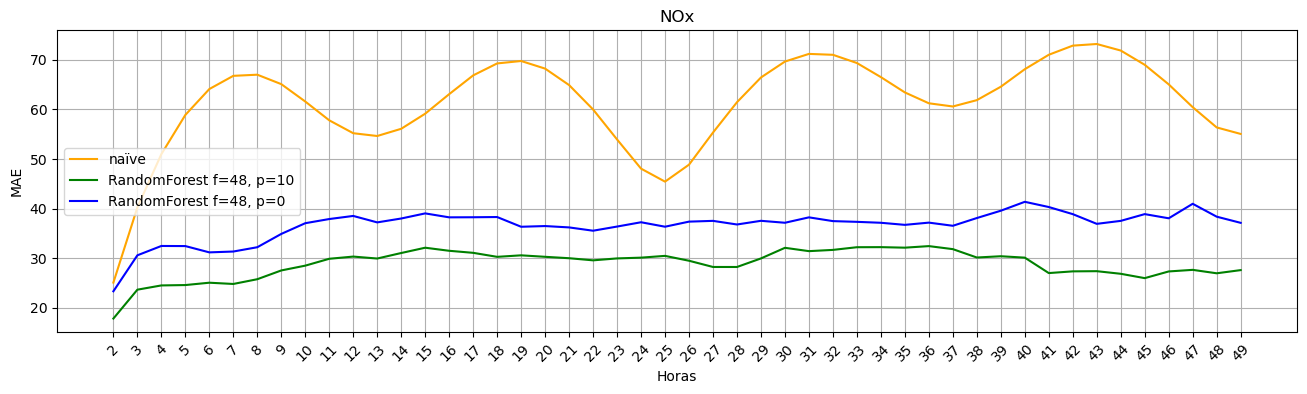

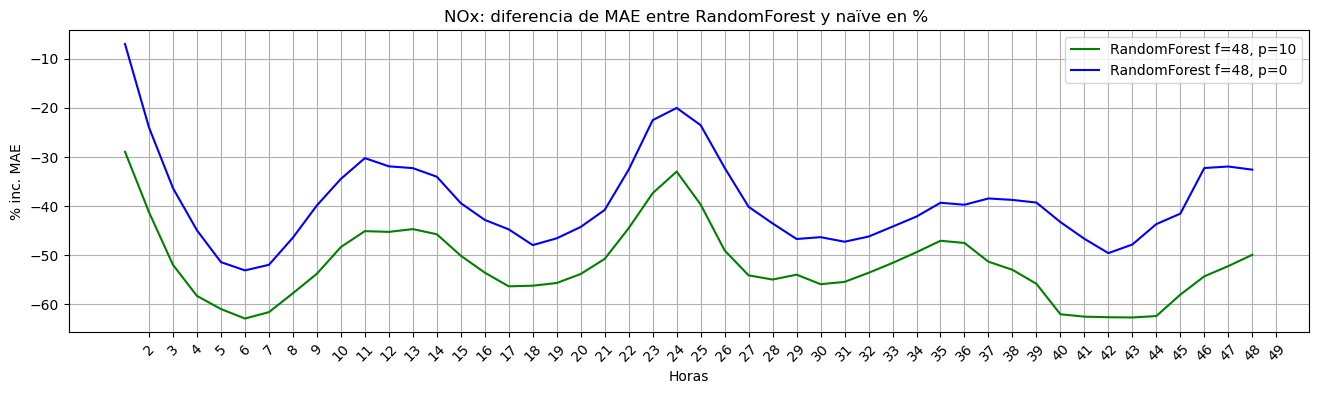

In [75]:
coly="NOx"

naive = [25.0692,40.2221,50.9765,58.8812,64.1076,66.7702,67.0012,65.0971,61.589,57.7999,55.1971,54.6362,56.0907,59.1371,63.0763,66.8621,69.274,69.7632,68.2286,64.9073,59.9861,53.9361,48.0529,45.4313,48.8561,55.3325,61.4539,66.4418,69.655,71.1959,71.0138,69.3578,66.5107,63.4244,61.2336,60.5909,61.8684,64.5751,68.1077,71.0212,72.8631,73.1932,71.8734,68.997,65.0508,60.4514,56.3651,55.0528,]
# 48 hora f, 10 pasado, 271 columnas
real10 = [17.8159,23.6374,24.4958,24.5704,25.0431,24.7911,25.7482,27.5188,28.4856,29.8708,30.3138,29.9217,31.0334,32.1018,31.4828,31.0701,30.262,30.5666,30.2673,29.9848,29.5556,29.9449,30.0989,30.4563,29.4748,28.2175,28.2149,29.9424,32.0831,31.411,31.6622,32.2028,32.2183,32.1112,32.426,31.8161,30.1268,30.3821,30.0991,26.9883,27.3332,27.3706,26.8429,25.9664,27.3161,27.6364,26.9444,27.5843,]
real0 = [23.3137,30.5707,32.4552,32.4332,31.163,31.3332,32.2022,34.8865,37.0465,37.8869,38.5126,37.2105,37.9945,39.0243,38.2298,38.2472,38.2913,36.3291,36.4713,36.198,35.5311,36.3698,37.239,36.3389,37.3633,37.5183,36.7873,37.5298,37.1365,38.2264,37.4676,37.3215,37.133,36.7134,37.1633,36.5268,38.0883,39.5653,41.3618,40.309,38.8751,36.9176,37.5162,38.8799,38.0376,40.9631,38.3644,37.1195,]

muestra2(naive,real10,real0,coly)

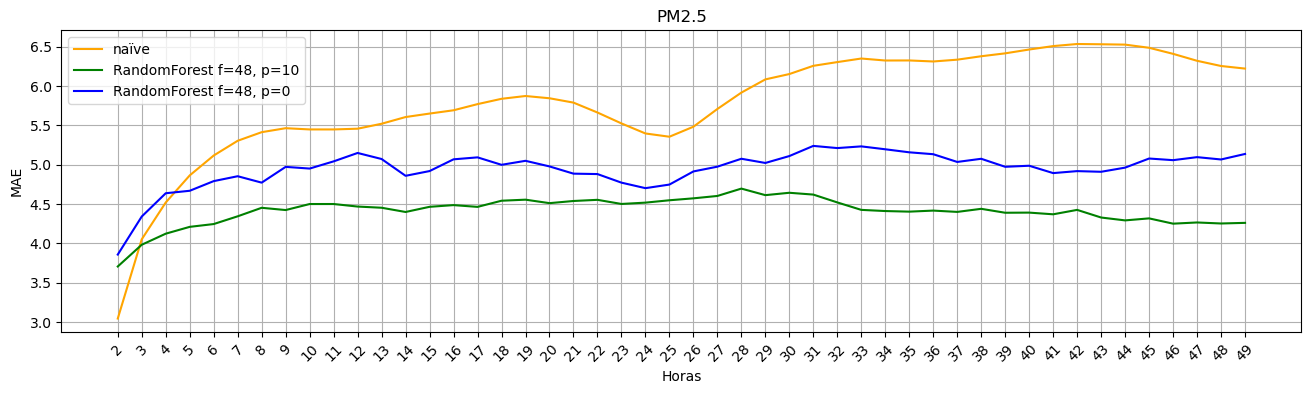

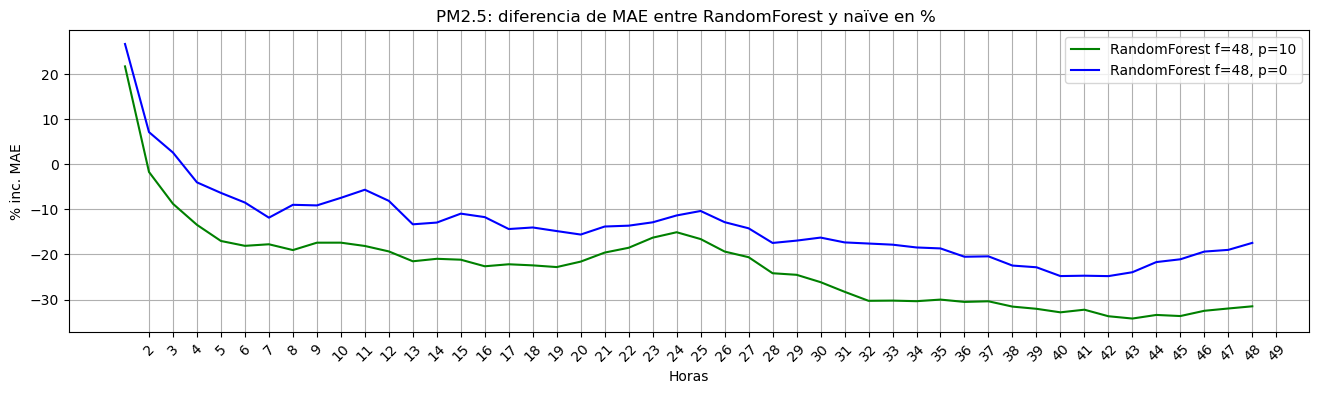

In [57]:
coly="PM2.5"
naive = [3.0463,4.0529,4.5203,4.8641,5.1167,5.304,5.4131,5.4636,5.4479,5.4478,5.4572,5.5202,5.6053,5.6494,5.6912,5.7693,5.8369,5.8724,5.8438,5.7885,5.6628,5.5243,5.3967,5.3553,5.4822,5.7077,5.9156,6.0834,6.1512,6.2558,6.3031,6.3485,6.3232,6.324,6.3109,6.3338,6.3773,6.4142,6.4628,6.5064,6.5329,6.5295,6.525,6.4849,6.4079,6.3196,6.2534,6.2207,]
# 48 hora f, 10 pasado, 271 columnas
real0 = [3.8588,4.342,4.6375,4.6689,4.7916,4.8537,4.7722,4.9725,4.951,5.0423,5.1491,5.0723,4.859,4.9192,5.0683,5.0932,4.9986,5.0494,4.9782,4.8864,4.8811,4.7722,4.7021,4.7477,4.9144,4.975,5.0756,5.0221,5.1098,5.2388,5.2111,5.2327,5.1959,5.1574,5.1333,5.035,5.0752,4.9735,4.9868,4.8934,4.9186,4.9101,4.9629,5.0785,5.0577,5.096,5.0664,5.1364,]
real10 = [3.7075,3.9836,4.124,4.2107,4.2463,4.3447,4.4528,4.4241,4.5006,4.5008,4.4685,4.4534,4.3996,4.4652,4.4869,4.4644,4.5425,4.5559,4.5117,4.5392,4.5539,4.5015,4.5183,4.5483,4.5729,4.6031,4.6966,4.6134,4.6435,4.6205,4.521,4.4263,4.4115,4.4039,4.4172,4.4006,4.4397,4.3898,4.3916,4.3702,4.4262,4.3292,4.2928,4.3183,4.2513,4.2664,4.2535,4.2614,]

muestra2(naive,real10,real0,coly)

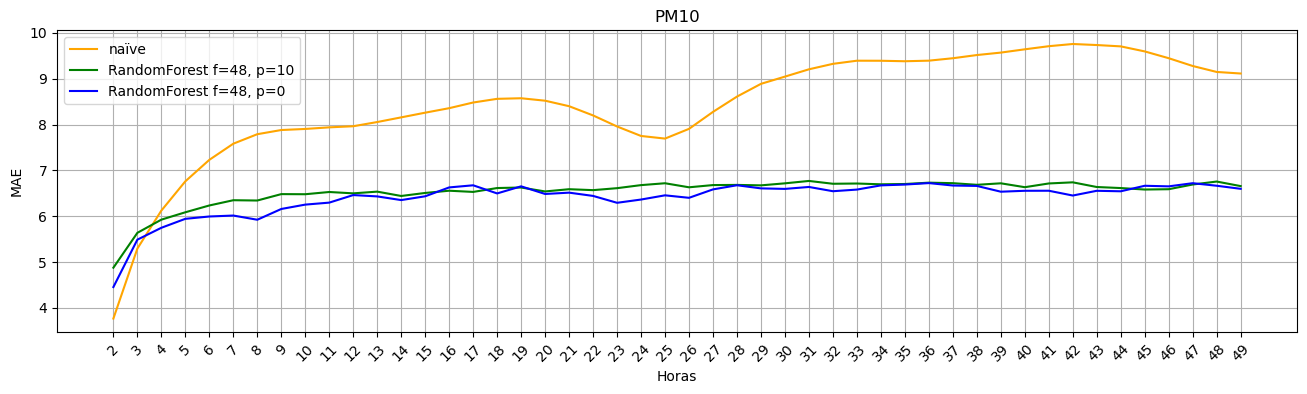

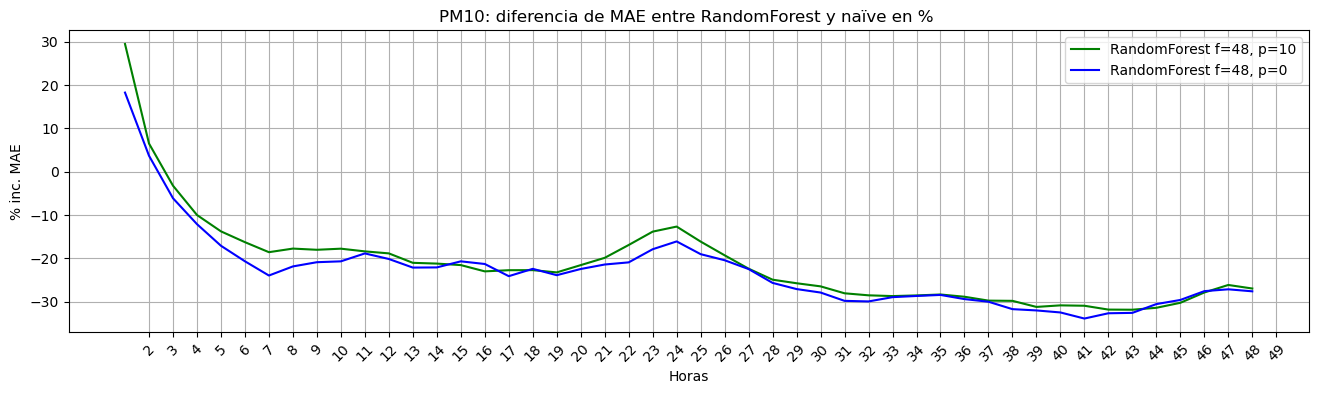

In [69]:
coly="PM10"
naive = [3.7673,5.2938,6.1227,6.7614,7.2296,7.582,7.789,7.8803,7.9038,7.9386,7.9628,8.0545,8.1565,8.2587,8.3569,8.4804,8.5607,8.5735,8.52,8.4,8.1986,7.9576,7.7505,7.6935,7.9058,8.2761,8.6098,8.8879,9.0456,9.2049,9.3241,9.3927,9.3916,9.3808,9.3936,9.4465,9.516,9.5696,9.6411,9.709,9.7571,9.7344,9.7052,9.5953,9.4471,9.2774,9.1472,9.1132,]
# 48 hora f, 10 pasado, 271 columnas
real0 = [4.4547,5.4886,5.7476,5.9429,5.9938,6.0144,5.9229,6.1578,6.253,6.2964,6.461,6.432,6.3517,6.4345,6.6281,6.6743,6.497,6.6517,6.4852,6.5139,6.4426,6.2926,6.3637,6.4555,6.4012,6.5852,6.6754,6.6071,6.5957,6.6381,6.5452,6.5809,6.6727,6.6908,6.7225,6.6695,6.6607,6.5346,6.5547,6.5556,6.451,6.5545,6.5437,6.664,6.6512,6.7202,6.6647,6.5976,]
real10 = [4.877,5.6375,5.925,6.0857,6.2341,6.3488,6.3423,6.482,6.4795,6.5282,6.4986,6.5361,6.4413,6.5074,6.556,6.53,6.6146,6.626,6.5403,6.5891,6.5688,6.6117,6.6783,6.719,6.6308,6.6793,6.6827,6.673,6.7173,6.7694,6.7079,6.7133,6.696,6.7026,6.7318,6.7207,6.685,6.7178,6.633,6.7144,6.7391,6.637,6.6142,6.582,6.589,6.6916,6.7563,6.6567,]

muestra2(naive,real10,real0,coly)

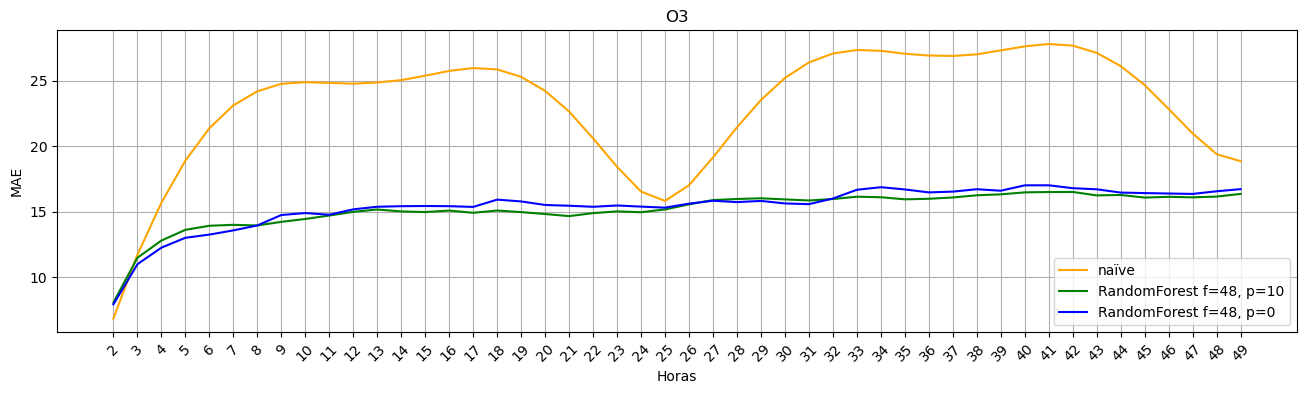

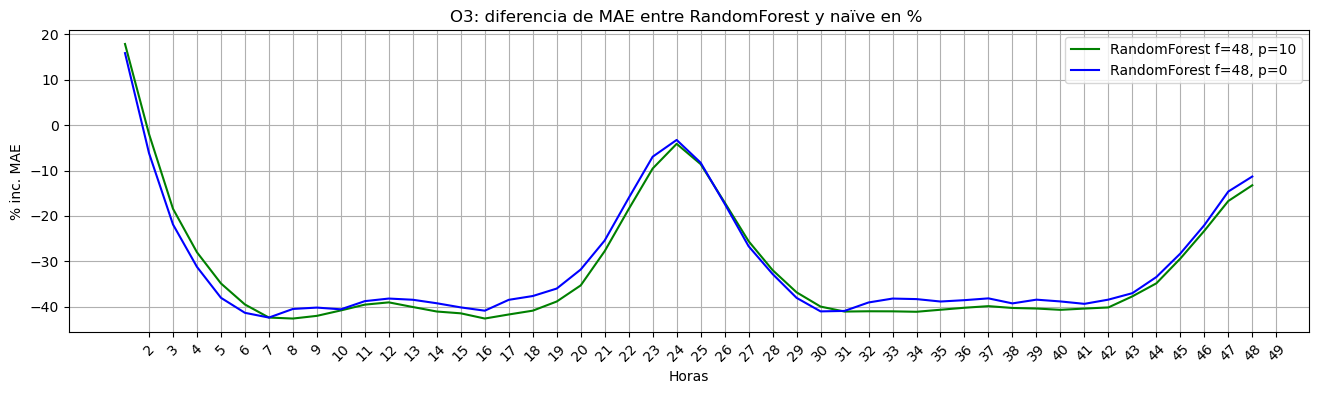

In [87]:
coly = "O3"
naive = [6.822,11.6923,15.6721,18.8995,21.3711,23.1241,24.1984,24.7718,24.8971,24.8388,24.7816,24.8731,25.0511,25.3917,25.7582,25.9773,25.8725,25.3048,24.2304,22.6553,20.6026,18.4262,16.5325,15.8168,17.0174,19.1442,21.4499,23.5357,25.2218,26.4059,27.0903,27.3574,27.2959,27.0689,26.9358,26.9035,27.0253,27.3278,27.6359,27.8164,27.6936,27.1389,26.1268,24.6718,22.8459,20.9736,19.3912,18.851,]
real10 = [8.0411,11.4653,12.7842,13.6046,13.9174,13.9867,13.9401,14.2163,14.4356,14.6992,14.9816,15.1604,15.0129,14.965,15.0781,14.909,15.0798,14.9614,14.8149,14.6561,14.8837,15.0165,14.9521,15.1641,15.5545,15.8847,15.964,16.0178,15.9317,15.8496,15.9639,16.1386,16.0979,15.9385,15.9806,16.0796,16.2476,16.3202,16.4698,16.4975,16.5014,16.2387,16.2711,16.0726,16.1301,16.0899,16.1492,16.3533,]
real0 = [7.9041,10.9715,12.2424,12.9963,13.2414,13.5621,13.9395,14.7394,14.8889,14.7594,15.1721,15.3699,15.4132,15.427,15.4145,15.3576,15.9152,15.7771,15.5063,15.4483,15.3675,15.4676,15.3815,15.3007,15.6091,15.8301,15.726,15.8158,15.6236,15.5707,16.0014,16.6689,16.866,16.6943,16.4682,16.529,16.7104,16.5953,17.0096,17.0115,16.7899,16.7058,16.4541,16.4152,16.3827,16.3518,16.5546,16.7167,]

muestra2(naive,real10,real0,coly)

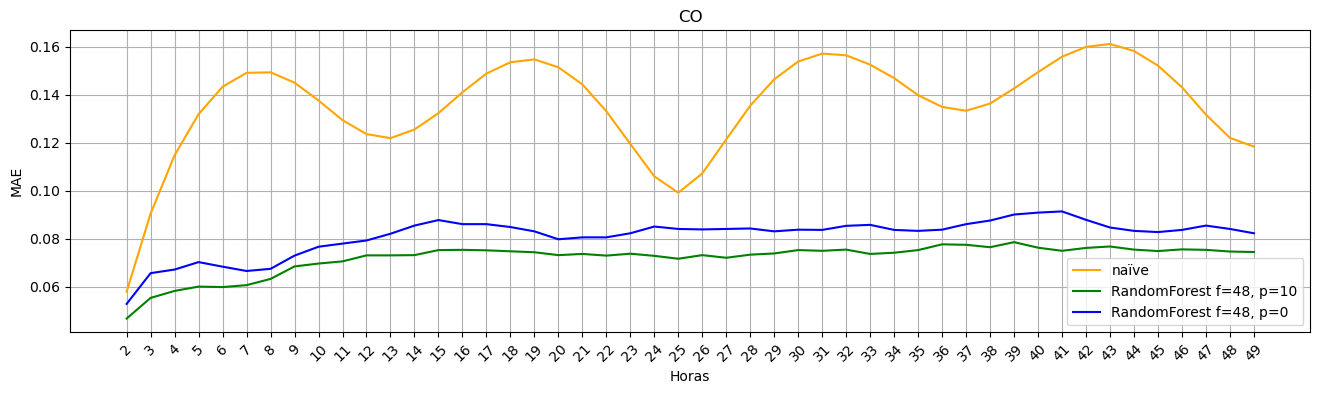

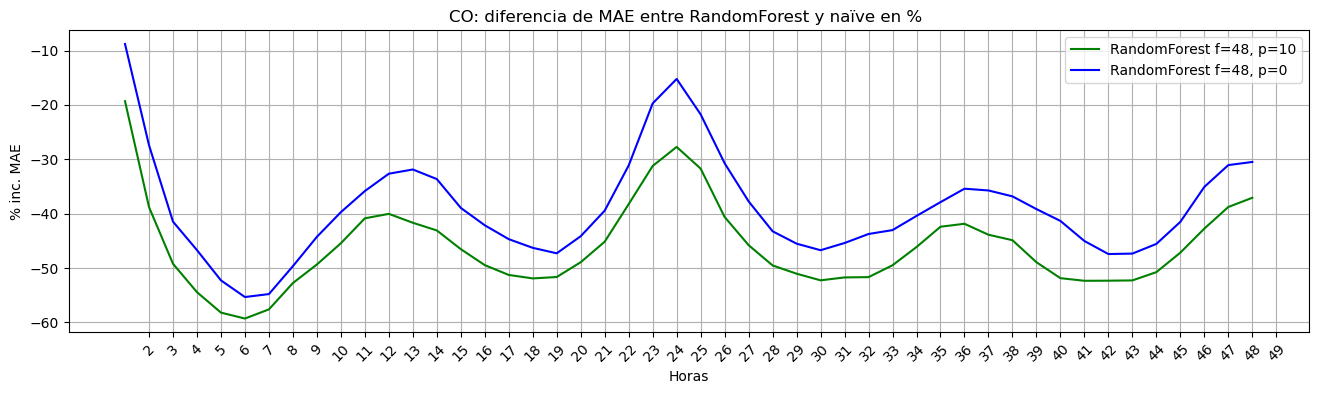

In [91]:
coly = "CO"
naive = [0.058,0.0905,0.1148,0.1319,0.1433,0.1491,0.1493,0.145,0.1376,0.1294,0.1236,0.1219,0.1255,0.1323,0.141,0.1488,0.1535,0.1547,0.1514,0.1443,0.1331,0.1195,0.106,0.0992,0.1072,0.1214,0.1354,0.1464,0.1538,0.1571,0.1564,0.1525,0.1469,0.1398,0.1349,0.1333,0.1363,0.1426,0.1494,0.1558,0.1599,0.1611,0.1582,0.1521,0.1431,0.1317,0.122,0.1184,]
real0 = [0.0529,0.0657,0.0672,0.0703,0.0684,0.0666,0.0675,0.073,0.0767,0.078,0.0793,0.0821,0.0855,0.0878,0.0861,0.0861,0.0849,0.0831,0.0798,0.0806,0.0806,0.0823,0.0851,0.0841,0.0839,0.0841,0.0843,0.0831,0.0838,0.0837,0.0854,0.0858,0.0837,0.0833,0.0838,0.0861,0.0876,0.0901,0.0909,0.0914,0.0879,0.0847,0.0833,0.0828,0.0837,0.0855,0.0841,0.0823,]
real10 = [0.0468,0.0554,0.0583,0.0601,0.0599,0.0607,0.0633,0.0685,0.0697,0.0706,0.0731,0.0731,0.0732,0.0753,0.0754,0.0752,0.0748,0.0744,0.0732,0.0737,0.073,0.0738,0.0729,0.0717,0.0732,0.0721,0.0734,0.0739,0.0753,0.075,0.0755,0.0737,0.0742,0.0753,0.0777,0.0775,0.0765,0.0786,0.0763,0.075,0.0762,0.0768,0.0755,0.0749,0.0756,0.0754,0.0747,0.0745,]

muestra2(naive,real10,real0,coly)

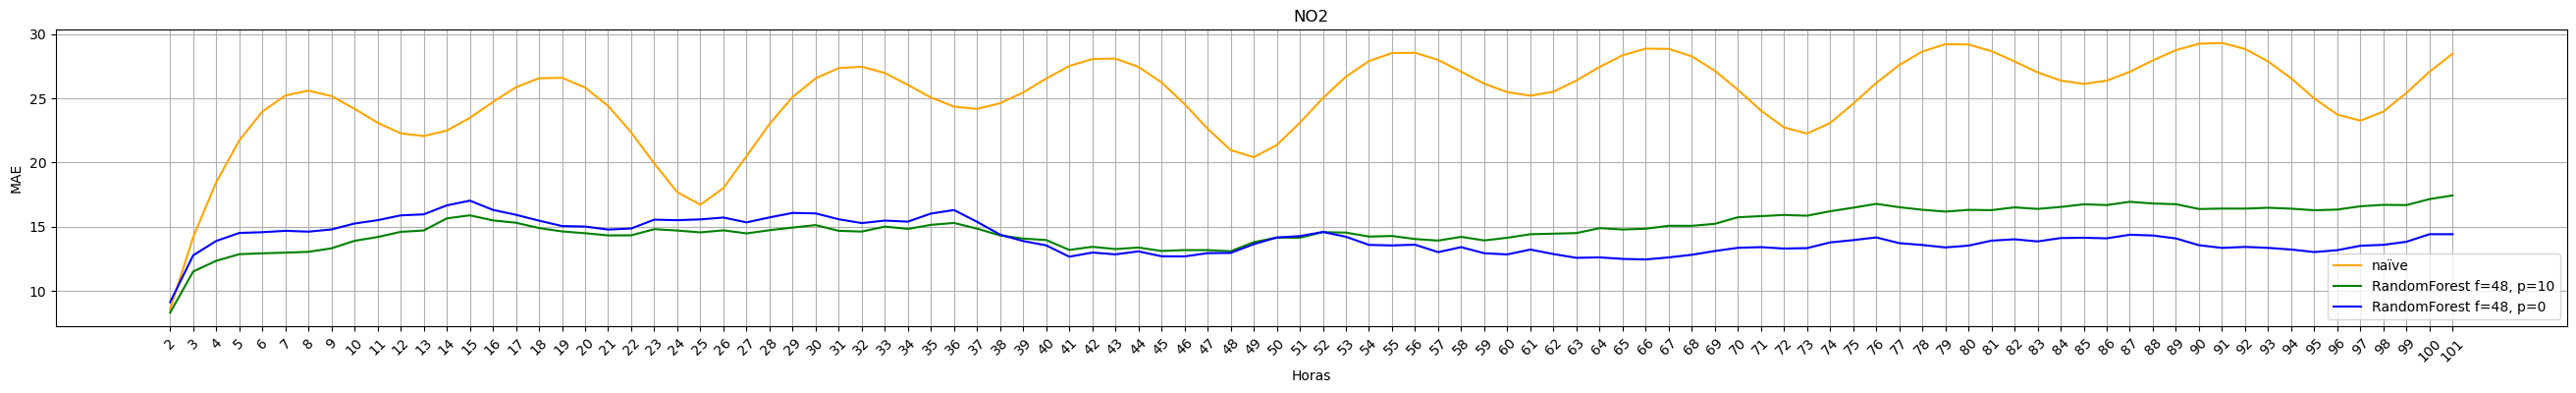

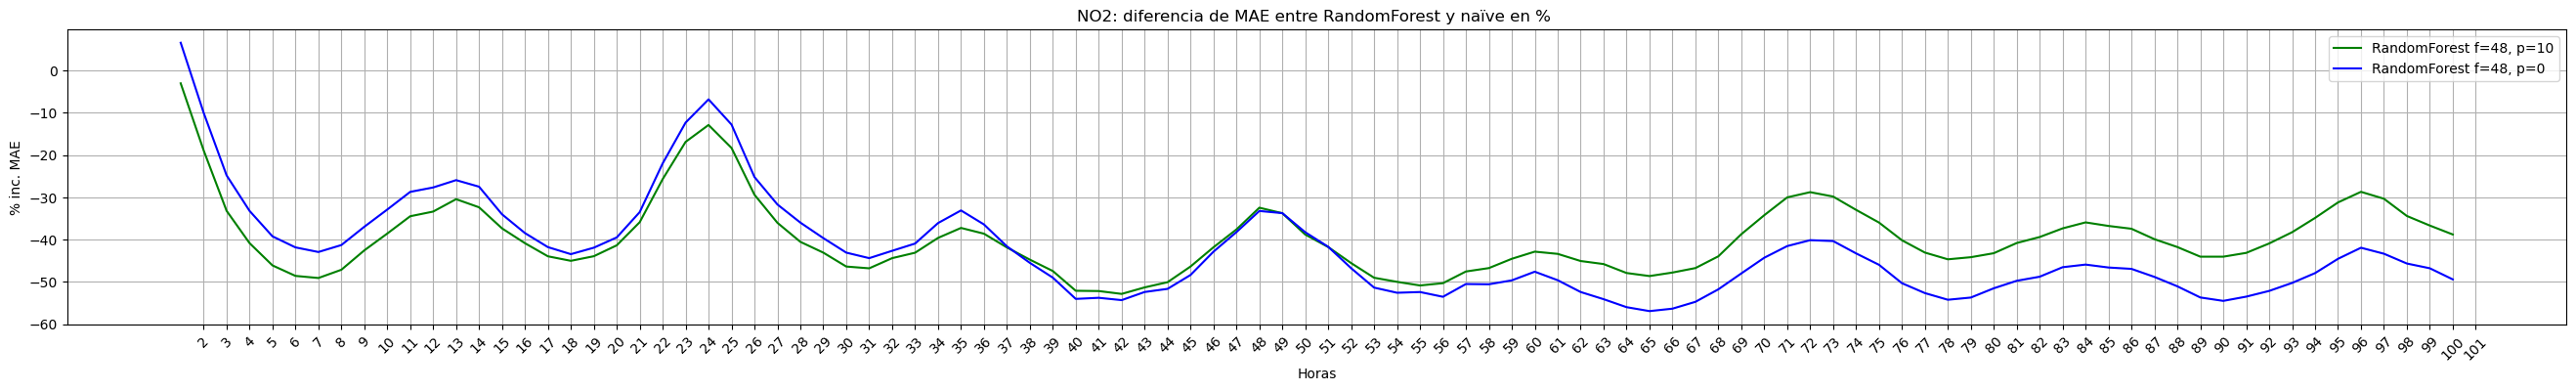

In [95]:
# 100 horas 
coly  ="NO2"
real0  =real10
real10 = [8.2841,11.4932,12.3287,12.8436,12.9117,12.9645,13.0274,13.3013,13.886,14.1818,14.5847,14.6915,15.6351,15.8717,15.4772,15.2942,14.8811,14.6185,14.4782,14.3071,14.3148,14.793,14.687,14.5446,14.7038,14.4648,14.7123,14.9192,15.11,14.6647,14.6067,14.9932,14.815,15.1303,15.2785,14.8351,14.3069,14.0611,13.9459,13.177,13.4189,13.2439,13.3614,13.0958,13.1614,13.1613,13.0752,13.78,14.1401,14.127,14.5633,14.5255,14.2177,14.2636,14.0254,13.9038,14.1958,13.9162,14.1256,14.4,14.4434,14.4915,14.8736,14.7677,14.8269,15.0571,15.0522,15.2103,15.722,15.8096,15.9009,15.8432,16.1884,16.467,16.7668,16.5055,16.3046,16.1638,16.2959,16.2776,16.4933,16.3729,16.524,16.7312,16.6723,16.9276,16.7934,16.7407,16.3654,16.3983,16.3951,16.464,16.3914,16.2682,16.32,16.5764,16.6894,16.6703,17.1359,17.4247,]
naive = [8.5447,14.1711,18.4545,21.7084,23.9599,25.2172,25.5879,25.1633,24.1723,23.0893,22.2607,22.0514,22.4782,23.4665,24.7028,25.8577,26.5515,26.5902,25.8244,24.3976,22.3298,19.9137,17.6724,16.6982,18.0013,20.4858,22.9979,25.0883,26.5496,27.3465,27.4551,26.9619,26.0396,25.0514,24.3462,24.1641,24.608,25.4479,26.5294,27.5118,28.0553,28.0866,27.4427,26.2339,24.5416,22.6228,20.9577,20.4029,21.347,23.088,25.0074,26.6836,27.892,28.5235,28.5371,27.9807,27.0636,26.1302,25.4714,25.1978,25.5093,26.3818,27.4368,28.3478,28.8604,28.8433,28.2613,27.1394,25.6591,24.0399,22.7222,22.2468,23.0678,24.5667,26.1873,27.5842,28.6414,29.2116,29.1865,28.6691,27.8661,27.0163,26.3753,26.1152,26.37,27.058,27.9455,28.7468,29.2461,29.3054,28.8364,27.8657,26.5467,24.9813,23.7253,23.2505,23.9586,25.4191,27.063,28.468,]

muestra2(naive,real10,real0,coly)

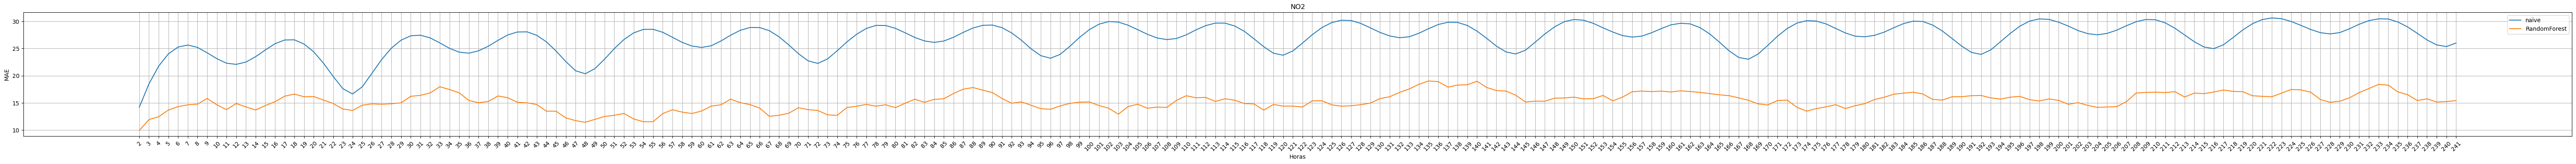

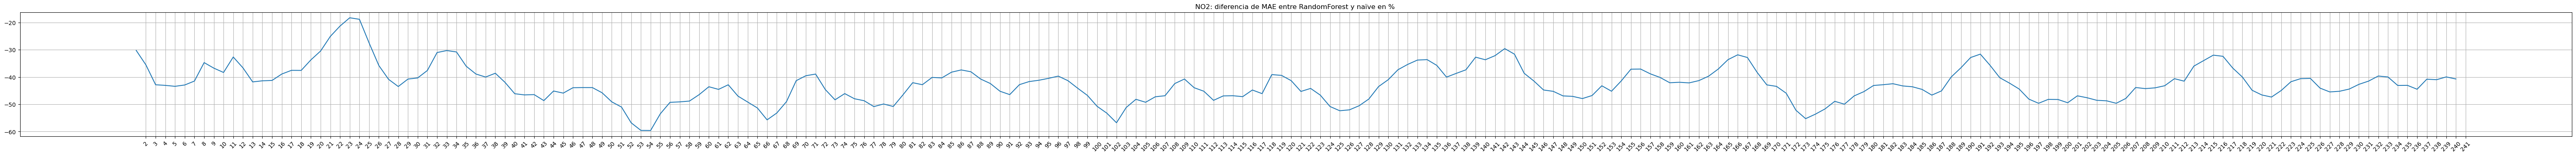

In [36]:
# 240 horas 
coly  ="NO2"
real = [9.9041,11.9168,12.4327,13.6658,14.2966,14.6309,14.7518,15.8078,14.6296,13.7477,14.8692,14.257,13.6716,14.4897,15.2029,16.2315,16.6105,16.1152,16.1613,15.5097,14.8786,13.8576,13.5932,14.5622,14.8118,14.7427,14.8223,14.9914,16.1929,16.3756,16.8202,17.9589,17.4551,16.8318,15.4385,15.0161,15.2437,16.2653,15.95,15.1021,14.9973,14.6869,13.4628,13.4545,12.2223,11.7264,11.4201,11.9467,12.4896,12.7027,13.0525,12.0334,11.5177,11.5198,13.0122,13.7246,13.2914,13.0297,13.484,14.3913,14.6288,15.6817,15.0245,14.6708,14.0345,12.5172,12.7025,13.0813,14.1023,13.7439,13.5923,12.783,12.694,14.1336,14.3693,14.7141,14.3769,14.6431,14.12,14.9131,15.6609,15.0904,15.6343,15.7412,16.7232,17.5062,17.816,17.3439,16.8931,15.7943,14.9136,15.1705,14.5499,13.926,13.8102,14.4311,14.8951,15.1192,15.1593,14.5143,14.0003,12.9058,14.2965,14.7493,14.0072,14.2098,14.1535,15.46,16.3034,15.9348,16.0,15.2621,15.7456,15.4851,14.8684,14.7872,13.6562,14.6957,14.3989,14.4005,14.2244,15.3672,15.3868,14.6336,14.3816,14.457,14.6521,14.9555,15.7904,16.12,16.915,17.5475,18.4088,19.0214,18.9046,17.887,18.2742,18.3222,18.9728,17.8262,17.2596,17.1569,16.4112,15.1549,15.3115,15.2866,15.8624,15.8871,16.0451,15.7319,15.7633,16.3579,15.3608,16.0342,17.0364,17.1631,17.0647,17.1462,16.9969,17.2121,17.0808,16.9252,16.6995,16.4772,16.3161,15.9119,15.4613,14.8014,14.607,15.42,15.5,14.186,13.4669,13.9312,14.2596,14.6586,13.9399,14.4726,14.8367,15.5994,16.0155,16.5857,16.7821,16.9457,16.618,15.6397,15.5003,16.1115,16.1293,16.3112,16.3557,15.9098,15.6818,16.0373,16.1831,15.5852,15.3344,15.7246,15.445,14.7261,15.0303,14.5303,14.1576,14.2418,14.2914,15.2258,16.8032,16.9122,16.966,16.8822,17.0603,16.071,16.7982,16.691,16.9864,17.3608,17.1051,17.0505,16.2989,16.1949,16.1241,16.7846,17.4598,17.377,16.9621,15.6104,15.0949,15.2942,15.9102,16.8798,17.6229,18.3865,18.2615,17.0038,16.4968,15.4287,15.7386,15.141,15.2237,15.4157]
naive = [14.1973,18.4922,21.7544,24.0084,25.2691,25.64,25.2145,24.214,23.131,22.2957,22.0824,22.5048,23.4926,24.7281,25.8834,26.5712,26.601,25.8195,24.3829,22.3036,19.8664,17.6092,16.63,17.9393,20.4395,22.96,25.0602,26.5318,27.3366,27.4514,26.9598,26.0367,25.0414,24.3288,24.141,24.5782,25.416,26.5016,27.4904,28.0384,28.0743,27.434,26.227,24.528,22.5997,20.9162,20.3488,21.2907,23.0383,24.9698,26.6579,27.8756,28.5168,28.5383,27.9871,27.0693,26.1319,25.4697,25.1949,25.5073,26.3815,27.4423,28.3588,28.8726,28.8585,28.2799,27.1566,25.6712,24.0452,22.7288,22.2573,23.082,24.5912,26.2208,27.6254,28.6896,29.2615,29.2365,28.7149,27.9018,27.0448,26.3956,26.1294,26.3817,27.076,27.9686,28.773,29.2718,29.3245,28.8429,27.8587,26.5263,24.9491,23.6836,23.2094,23.9244,25.3993,27.0576,28.4715,29.4795,29.9593,29.8738,29.2955,28.4702,27.6157,26.9433,26.6423,26.8486,27.5162,28.423,29.212,29.6773,29.676,29.1491,28.1708,26.7788,25.3412,24.1388,23.7641,24.5522,26.0072,27.538,28.8502,29.7679,30.2063,30.1562,29.63,28.8041,27.9575,27.3126,26.9918,27.1569,27.8046,28.6557,29.42,29.8342,29.8011,29.252,28.2024,26.8768,25.4444,24.3646,24.0001,24.6946,26.1601,27.6804,28.9818,29.9403,30.3405,30.209,29.6308,28.8097,28.0427,27.39,27.1004,27.2827,27.9035,28.6563,29.3613,29.6466,29.5337,28.8475,27.6971,26.1864,24.5873,23.3516,23.0237,23.9854,25.5798,27.2648,28.6837,29.6798,30.1245,30.0599,29.5325,28.7052,27.8704,27.2768,27.1625,27.4225,28.0136,28.8292,29.5866,30.0401,29.9759,29.316,28.2348,26.8488,25.4515,24.2926,23.9154,24.7477,26.2477,27.768,29.1157,30.045,30.4567,30.3651,29.8516,29.1345,28.3127,27.7399,27.524,27.7829,28.3845,29.1965,29.9353,30.3433,30.2898,29.7242,28.7312,27.4874,26.2512,25.285,24.9748,25.6846,27.024,28.4267,29.5686,30.3258,30.6332,30.4932,29.9694,29.2577,28.5124,27.9176,27.6873,27.9337,28.6358,29.4619,30.1308,30.4631,30.4383,29.8855,28.9763,27.798,26.5869,25.6629,25.3615,26.012]
muestra(naive,real,coly)